## `Imports`

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

#### Reading in data

In [2]:
# read in train data
train = pd.read_csv('../data/train_users_2.csv')

## `Data Cleaning`

#### Initial checks

In [3]:
# check data
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
# check for null values
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
# check shape
train.shape

(213451, 16)

#### Missingno

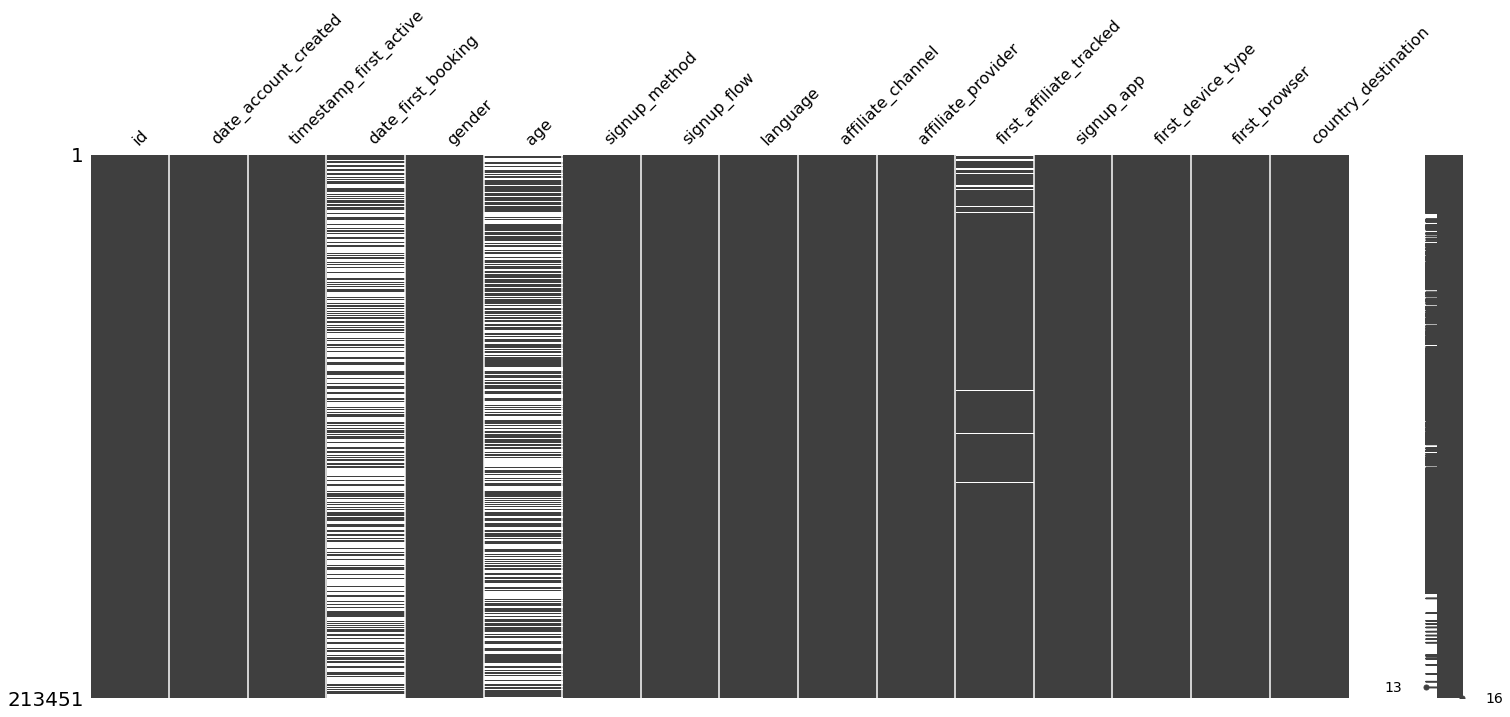

In [6]:
# check for patterns
msno.matrix(train);

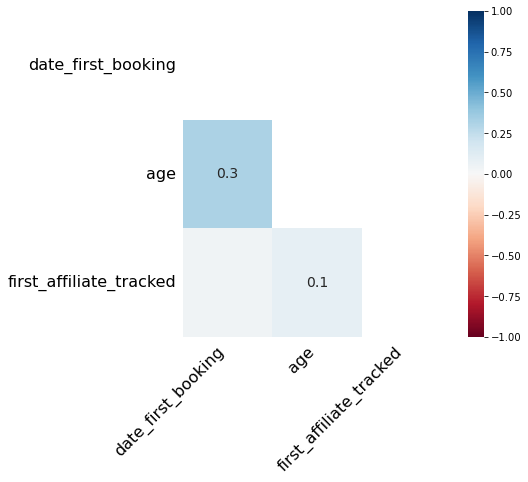

In [7]:
msno.heatmap(train, figsize=(6,6));

### 3 Features with null values:
* date_first_booking
* age
* first_affiliate_tracked

#### Date First Booking

In [8]:
# check if null date_first_booking has distinct country_destination
train[train['date_first_booking'].isna()]['country_destination'].value_counts()

NDF    124543
Name: country_destination, dtype: int64

In [9]:
# NaN in date_first_booking as 'no date' - categorical variable
train['date_first_booking'].fillna('no date', inplace=True)

* All null values corresponding to NDF (No Desitnation Found); expected strong relationship found
* Feature will be treated as categorical and will be dropped if later if using a ARIMA model later on

#### Age

In [10]:
# check for pattern with null values
train[train['age'].isnull()]['country_destination'].value_counts()

NDF      67614
US       13773
other     2518
FR        1310
IT         799
GB         550
ES         543
CA         351
DE         210
NL         160
AU         103
PT          59
Name: country_destination, dtype: int64

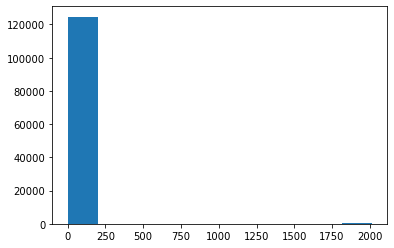

In [11]:
# check for age distribution
plt.hist(train['age']);

In [12]:
# data entry error transformed above 1000, likely DOB, tranformed to age
train.loc[train['age']>=1000, 'age'] = [2015-each for each in train[train['age']>=1000]['age']]

In [13]:
# drop ages above 122 because no human has lived longer than 122
train.drop(index=train.loc[train['age']>=123, 'age'].index, inplace=True)

# drop ages below 18 because of airbnb age restriction at 18
train.drop(index=train.loc[train['age']<18, 'age'].index, inplace=True)

#### First Affiliate Tracked

In [14]:
# check if null values are related to country destination
train[train['first_affiliate_tracked'].isnull()]['country_destination'].value_counts()

NDF      4277
US       1307
FR        121
other     113
IT         44
CA         37
ES         36
GB         28
DE         20
AU         12
NL         11
PT          3
Name: country_destination, dtype: int64

In [15]:
# null values to 'unknown' - categorical variable
train['first_affiliate_tracked'].fillna('unknown', inplace=True)

**Overall Notes**:
* Date first booking & First affiliate tracked - treated as categorical
* Age entry errors handled but null values will be imputed (potentially dropped later)    

## `Data Cleaning: Session`

#### Reading in data

In [16]:
# read in session data
session = pd.read_csv('../data/sessions.csv')

#### Initial checks

In [17]:
# look of session dataframe
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [18]:
# check for null values
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [19]:
# check for shape
session.shape

(10567737, 6)

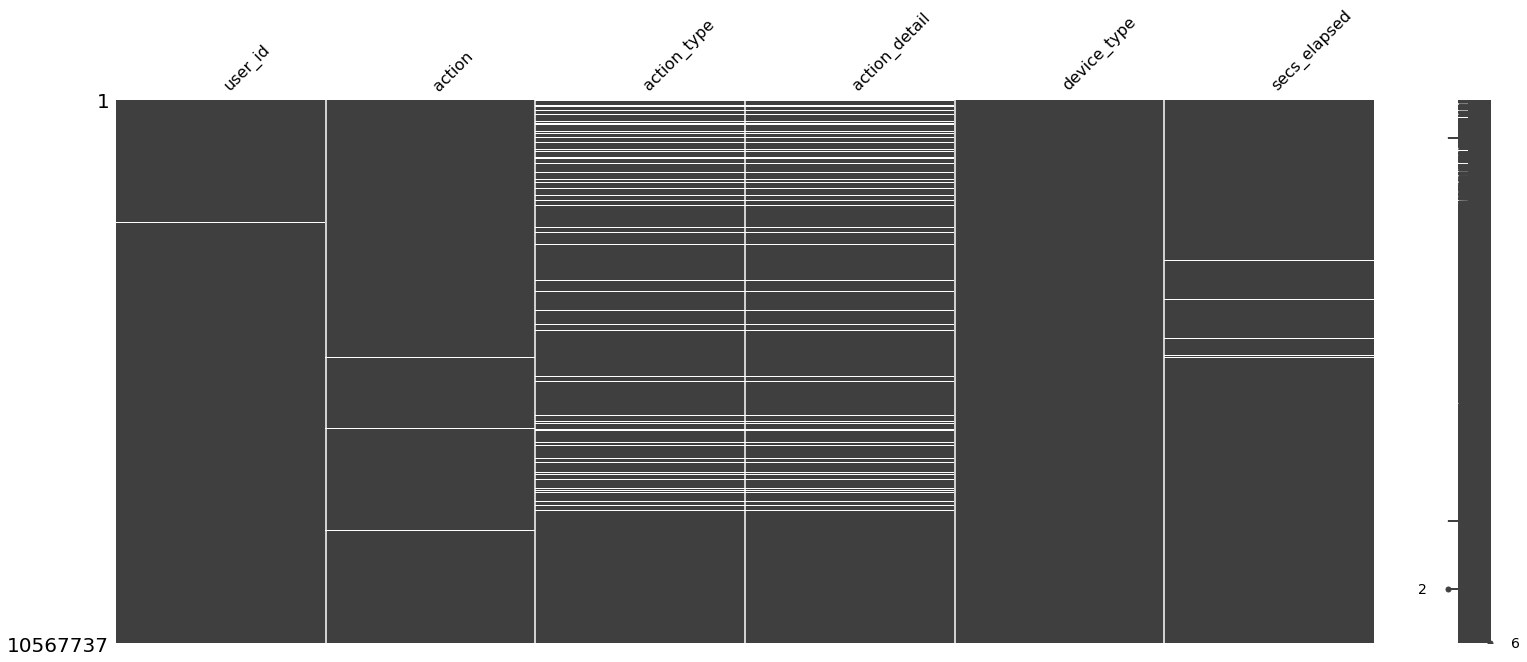

In [20]:
# check for patterns in null values
msno.matrix(session);

### 5 Features with null values:
* User ID
* Action
* Action type
* Action detail
* Secs elapsed

#### User id

In [21]:
# dropping null values for user_id
session = session[session['user_id'].notna()]

#### Action

In [22]:
# check action null values
session[session['action'].isnull()]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
45,d1mm9tcy42,NaN,message_post,message_post,Windows Desktop,NaN
138,4grx6yxeby,NaN,message_post,message_post,Windows Desktop,59801.0
317,xwxei6hdk4,NaN,message_post,message_post,iPad Tablet,NaN
320,xwxei6hdk4,NaN,message_post,message_post,iPad Tablet,0.0
382,ro2stddszp,NaN,message_post,message_post,Mac Desktop,7192.0
...,...,...,...,...,...,...
10566820,gpijioh4eh,NaN,message_post,message_post,Mac Desktop,19685.0
10566859,gpijioh4eh,NaN,message_post,message_post,Mac Desktop,NaN
10566961,gpijioh4eh,NaN,message_post,message_post,Mac Desktop,5280.0
10566984,gpijioh4eh,NaN,message_post,message_post,Mac Desktop,52498.0


In [23]:
session[session['action'].isna()]['action_type'].value_counts()

message_post    79480
Name: action_type, dtype: int64

In [24]:
session[session['action'].isna()]['action_detail'].value_counts()

message_post    79480
Name: action_detail, dtype: int64

In [25]:
session[session['action']=='unknown']['action_type'].value_counts()

Series([], Name: action_type, dtype: int64)

In [26]:
# setting null values for action to unknown - categorical variable
session['action'].fillna('unknown', inplace=True)

#### Action type & detail

In [27]:
# check if message_post has a patterened null value
session[session['action_type']=='message_post']['action'].value_counts()

unknown                   79480
10                         3202
12                         2204
15                         1053
11                          702
guest_booked_elsewhere      221
multi_message                52
maybe_information             7
preapproval                   2
special_offer                 2
Name: action, dtype: int64

In [28]:
# replace action type null value with -unknown-
session['action_type'].fillna('-unknown-', inplace=True)

In [29]:
# replace action detail null value with -unknown-
session['action_detail'].fillna('-unknown-', inplace=True)

#### Secs elapsed

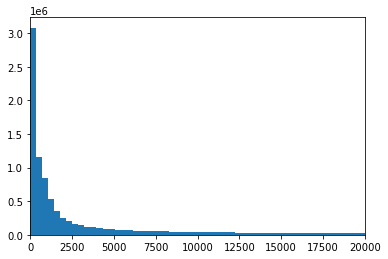

In [30]:
plt.hist(session['secs_elapsed'], bins=5000)
plt.xlim(0,20000);

In [31]:
# null values per secs elapsed match exactly with each user_id
print(len(session[session['secs_elapsed'].isna()]['user_id'].unique()))
session['secs_elapsed'].isna().sum()

135483


135483

In [32]:
# check rows with secs elapsed as null values
session[session['secs_elapsed'].isna()]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
45,d1mm9tcy42,unknown,message_post,message_post,Windows Desktop,NaN
128,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN
137,4grx6yxeby,create,submit,create_user,Windows Desktop,NaN
163,ncf87guaf0,create,submit,create_user,Windows Desktop,NaN
306,4rvqpxoh3h,create,-unknown-,-unknown-,iPhone,NaN
...,...,...,...,...,...,...
10567520,cv0na2lf5a,create,submit,create_user,Windows Desktop,NaN
10567617,zp8xfonng8,create,submit,signup,Android Phone,NaN
10567676,fa6260ziny,callback,partner_callback,oauth_response,Windows Desktop,NaN
10567711,87k0fy4ugm,create,submit,create_user,Mac Desktop,NaN


In [33]:
# check for patterns with null values
session[session['secs_elapsed'].isna()]['action_detail'].value_counts()

create_user                  53097
signup                       20987
login                        16768
message_post                 15418
-unknown-                    14851
                             ...  
request_new_confirm_email        1
apply_coupon_click               1
read_policy_click                1
p4_terms                         1
listing_descriptions             1
Name: action_detail, Length: 69, dtype: int64

In [34]:
session[session['secs_elapsed'].isna()]['action'].value_counts()

create                                  74193
authenticate                            19024
unknown                                 15418
active                                  11111
callback                                 8974
                                        ...  
my                                          1
ajax_referral_banner_experiment_type        1
payout_preferences                          1
listing                                     1
view                                        1
Name: action, Length: 80, dtype: int64

In [35]:
session[session['secs_elapsed'].isna()]['action_type'].value_counts()

submit              91176
message_post        15418
-unknown-           14851
partner_callback     8974
view                 3754
click                 623
data                  563
booking_request       124
Name: action_type, dtype: int64

In [36]:
135483/len(session)

0.012862422876301795

In [37]:
# drop values in secs elapsed because each user has 1 instance
session.drop(index=session[session['secs_elapsed'].isna()].index, inplace=True)

In [38]:
# running check (will delete)
session.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [39]:
session['action'].value_counts().head(25)

show                     2758841
index                     840969
search_results            723113
personalize               704745
search                    533812
ajax_refresh_subtotal     486410
similar_listings          363420
update                    362686
social_connections        337754
reviews                   319306
active                    176259
similar_listings_v2       168457
lookup                    161420
dashboard                 152382
header_userpic            140829
collections               124059
edit                      108919
campaigns                 101483
create                     81040
track_page_view            80948
unavailabilities           77981
qt2                        64582
unknown                    64062
notifications              59014
confirm_email              58438
Name: action, dtype: int64

**Overall Notes**:
* User id nulls were dropped - no id to match with users therefore unusable
* Action, action type, action detail nulls  set as unknown - categorical variable
* Secs elapsed nulls were dropped because imputation would be difficult w/o data dictionary (1% of data)

## `Saving Dataframes`

In [40]:
# rename train id column to user_id
train.rename(columns={'id': 'user_id'}, inplace=True)

In [41]:
# saving dataframes
train.to_csv('../data/train_cleaned.csv', index=False)
session.to_csv('../data/session_cleaned.csv', index=False)

In [42]:
# comparing unique users for train & session
print(f'number of users for train df  : {len(train["user_id"].unique())}')
print(f'number of users for session df: {len(session["user_id"].unique())}')

number of users for train df  : 212541
number of users for session df: 134057


**Note**:
* It is okay to lose users from session df because those users do not have a country_destination value
* Likely user loss from train data upon merge